In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Columns in the Data Frame
---

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Geographical Data Set
---

Dataset contains a latitude and longitude, let's view the data. `alpha` helps see the concentration of data

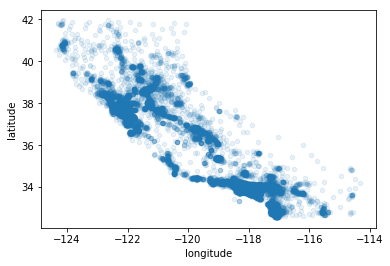

In [3]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Housing Prices
---

You can map the other data on top of the geographic data below

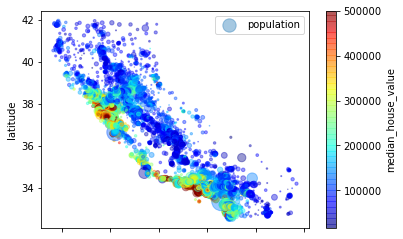

In [4]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"] / 100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

Correlations
---

_Pearson's_ $r$ - How much does each attribute correlate with the `median_house_value`?

In [5]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Focusing In
---

Let's focus in on some of the positive correlations, namely: `median_income, total_rooms, housing_median_age`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6884118470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6875670518>]], dtype=object)

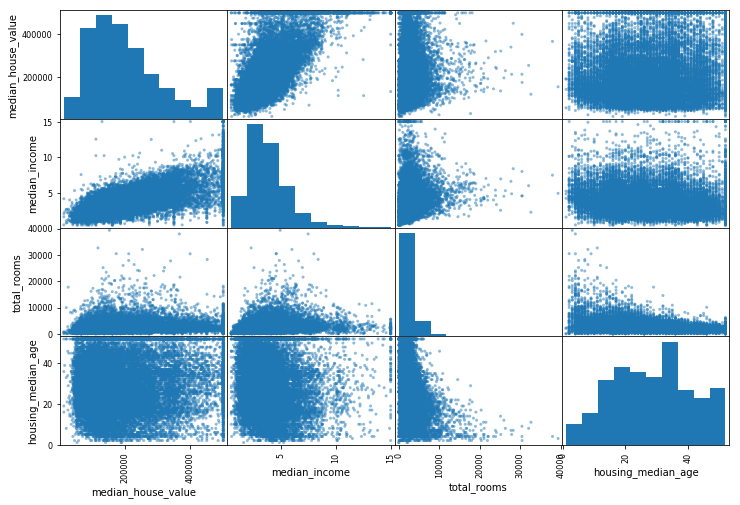

In [6]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Correlation
---

`median_house_value` looks to have a good correlation with `median_income`. We should zoom in.

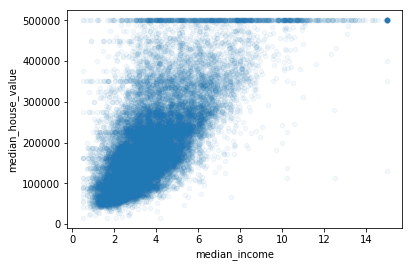

In [7]:
# Zoom in on median_house_value vs. median_income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.05)

Dirty Data
---

It's very clear that there is some capping made in the data. For example, there are some caps in `median_house_value` which are very clear at 500K and relatively clear at 450K and 350K. Keeping these in the data set means we will learn that data. We should remove those districts which provided that data.